In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [4]:
df = pd.read_csv("./cpn/importacoes.csv")

#df['ano'] = pd.to_datetime(df['ano'])
#df.set_index('ano', inplace=True)

df['positive'] = df['import'] > 0

df['color'] = df.positive.map({True: '#FF0000', False: '#00AA00'})

In [27]:
font = {'family' : 'Ubuntu',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

In [28]:
# A partir do 0.13 do Seaborn, o eixo dos XX tem de ser categórico
df['ano'] = df['ano'].astype('str')

In [29]:
# A palette tem de ser uma lista... a qualidade disto regrediu imenso
colors = list(df.color)

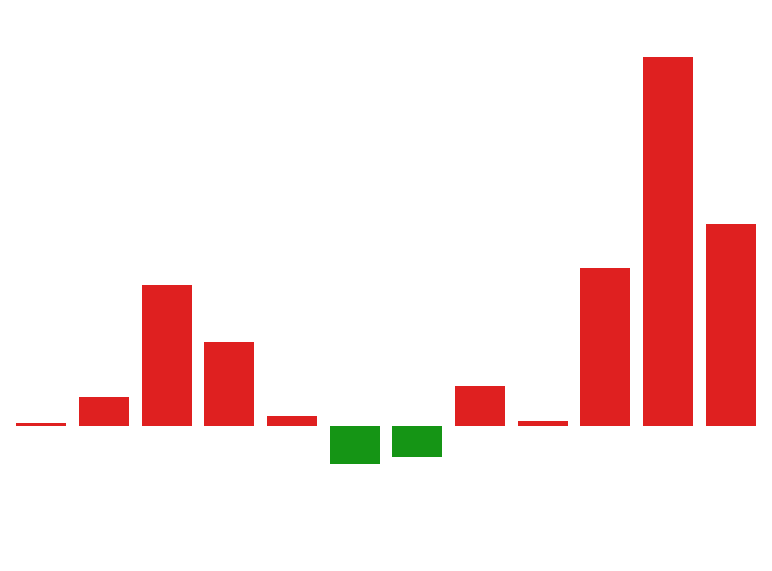

In [46]:
fig, ax = plt.subplots(figsize=(8,6))

letter_color ='w'

sns.barplot(data=df, x='ano', y='import', hue='ano', palette=colors)
sns.despine(offset=11, trim=True);

for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], color=letter_color)

ax.spines[['left', 'bottom']].set_visible(False)
ax.set_yticks([])
ax.set_ylabel("")

ax.set_xlabel("Ano", fontsize=18, color=letter_color)
ax.set_title("Importações Portuguesas de eletricidade em M€", loc='left', fontsize=18, color=letter_color)

ax.xaxis.label.set_color('white')

ax.tick_params(axis='x', colors=letter_color)
ax.text(0, 0.98, "Fonte: DGEG", va='top', transform=ax.transAxes, color=letter_color)
#ax.annotate("Fonte: DGEG", xy=(35,10), xycoords='figure points', color='w')

#ax.legend().set_visible(False)

plt.tight_layout()
#plt.savefig("importacoes.png", dpi=300, transparent=True)
plt.savefig("importacoes_eletricidade_transparente.png", dpi=300, transparent=True)
plt.show()

---